In [ ]:
# MNIST dataset downloaded from Kaggle : 
# https://www.kaggle.com/c/digit-recognizer/data


#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#loading/reading csv file 
data = pd.read_csv('/content/train.csv')

print(data.head(5)) # print first five rows of data.

#seperating x-matrix(features) and y-matrix(labels) by storing in different dataframes
# save the labels into a label dataframe.
label = data['label']
print(label.head(5))
print(type(label))

# Drop the label feature and store the pixel data(features) in feature.
feature = data.drop("label",axis=1)
print(feature.head(5))
print(type(feature))    

   label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]
0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64
<class 'pandas.core.series.Series'>
   pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0       0       0       0       0  ...         0         0         0         0
1       0       0       0       0  ...         0         0         0         0
2       0       0       0       0  ...         0         0         0         0
3       0       0       0       0  ...         0         0         0         0
4       0       

In [ ]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(feature)
print(standardized_data.shape)

(42000, 784)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


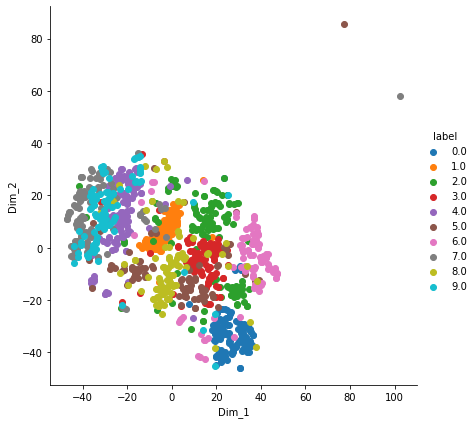

In [ ]:
# TSNE # https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
import seaborn as sns
from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:1000, :]
labels_1000 = labels[0:1000]

model = TSNE(n_components = 2, random_state = 0)
# configuring the parameteres
# the number of components = 2 -> dimensions of the embedded space.
# default perplexity = 30 -> erplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms.
# default learning rate = 200 -> The learning rate for t-SNE is usually in the range [10.0, 1000.0]. If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours. If the learning rate is too low, most points may look compressed in a dense cloud with few outliers. If the cost function gets stuck in a bad local minimum increasing the learning rate may help.
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T #https://numpy.org/doc/stable/reference/generated/numpy.vstack.html
tsne_df = pd.DataFrame(data = tsne_data, columns = ("Dim_1", "Dim_2", "label")) #https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue = "label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


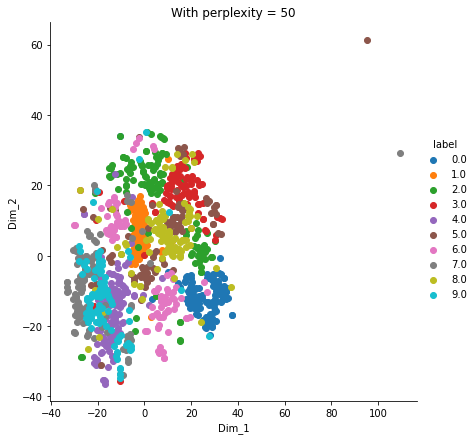

In [ ]:
model = TSNE(n_components = 2, random_state = 0, perplexity = 50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


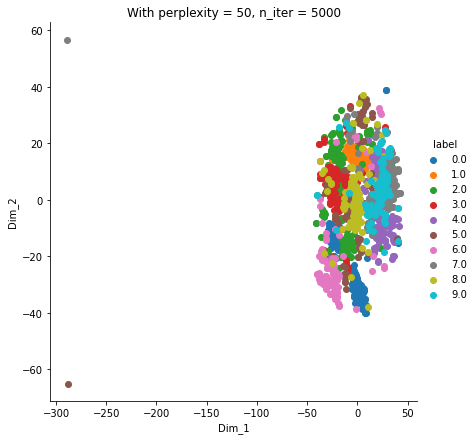

In [ ]:
model = TSNE(n_components = 2, random_state = 1, perplexity = 50,  n_iter = 5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue = "label", size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter = 5000')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


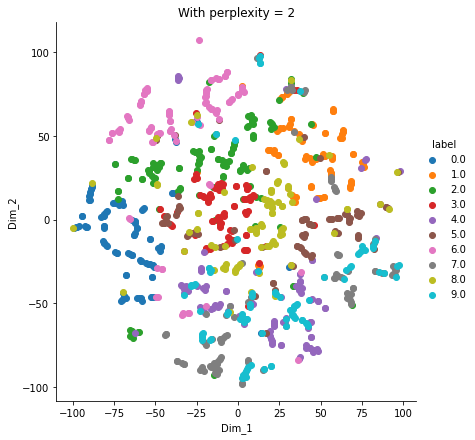

In [ ]:
model = TSNE(n_components = 2, random_state = 0, perplexity = 2)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue = "label", size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()